In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
from collections import Counter

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY", "COCHIN":"KOCHI"
}

In [4]:

# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1607.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    508    486
2    AGATTI ISLAND          KOCHI   1052      0
3        AHMEDABAD      BENGALURU  18138  17567
4        AHMEDABAD        CHENNAI  14057  13683
5        AHMEDABAD     COIMBATORE    830      0
..             ...            ...    ...    ...
304       VADODARA      HYDERABAD    315    381
305       VADODARA        KOLKATA    763      0
306       VADODARA        LUCKNOW    325    203
307       VADODARA         MUMBAI  25072  21699
308     VIJAYAWADA  VISAKHAPATNAM   1295   2498

[308 rows x 4 columns]
Raw_Data/1608.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI    397    548
2         AGARTALA  VISAKHAPATNAM     11      0
3    AGATTI ISLAND          KOCHI    411    465
4        AHMEDABAD      BENGALURU  18536  18791
5        AHMEDABAD        CH

Raw_Data/1709.csv
             city1          city2    to  from
SNo                                          
1             AGRA          DELHI     0    57
2             AGRA      KHAJURAHO    94     0
3             AGRA       VARANASI     0   410
4    AGATTI ISLAND          KOCHI   863   956
5           AIZAWL      AHMEDABAD    35    37
..             ...            ...   ...   ...
375     PUDUCHERRY     VIJAYAWADA     0    10
376         RAIPUR  VISAKHAPATNAM  1088     0
377       TIRUPATI     VIJAYAWADA   684   704
378     TRIVANDRUM        UDAIPUR    38    32
379     VIJAYAWADA  VISAKHAPATNAM  3164  3012

[379 rows x 4 columns]
Raw_Data/1710.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1260   1068
2         AGARTALA           PUNE    136      0
3         AGARTALA  VISAKHAPATNAM     91      0
4    AGATTI ISLAND          KOCHI   1035   1167
5             AGRA          DELHI      0     55
..    

Raw_Data/1811.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2289   2319
2         AGARTALA        CHENNAI   1586   1343
3         AGARTALA         NAGPUR     40      0
4         AGARTALA           PUNE    239      0
5    AGATTI ISLAND          KOCHI   2510     42
..             ...            ...    ...    ...
473       VADODARA         JAIPUR   1009   1011
474       VADODARA          KOCHI     35      0
475       VADODARA      MANGALORE    230      0
476       VADODARA         MUMBAI  21528  20802
477     VIJAYAWADA  VISAKHAPATNAM      0   5126

[477 rows x 4 columns]
Raw_Data/1812.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2308   2290
2         AGARTALA        CHENNAI   1536   1695
3         AGARTALA           PUNE    529      0
4    AGATTI ISLAND          KOCHI   2634    104
5             AGRA          

[538 rows x 4 columns]
Raw_Data/2001.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2198  2248
2      AGARTALA      BENGALURU  4294  4607
3      AGARTALA        CHENNAI  2320  1373
4      AGARTALA     COIMBATORE     0     5
5      AGARTALA          DELHI  5467  5823
..          ...            ...   ...   ...
534       SURAT        UDAIPUR  1331  1176
535    TIRUPATI     VIJAYAWADA   537   886
536     UDAIPUR  VISAKHAPATNAM    15     0
537    VARANASI  VISAKHAPATNAM     0   302
538  VIJAYAWADA  VISAKHAPATNAM  2419  2196

[538 rows x 4 columns]
Raw_Data/2002.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2178  2190
2      AGARTALA         AIZAWL    47    36
3      AGARTALA      BENGALURU  3517  3554
4      AGARTALA        CHENNAI  1895  1191
5      AGARTALA     COIMBATORE    10     6
..          ...            ...   ...   ...
541       SURA

In [5]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

AGATTI ISLAND
KOCHI
AHMEDABAD
BENGALURU
BHOPAL
CHENNAI
COIMBATORE
DELHI
DIBRUGARH
GOA
GUWAHATI
HYDERABAD
IMPHAL
INDORE
JAIPUR
KOLKATA
LUCKNOW
MUMBAI
NAGPUR
PUNE
AIZAWL
AMRITSAR
SRINAGAR
BAGDOGRA
BELGAUM
JABALPUR
AGARTALA
CHANDIGARH
DEHRA DUN
HUBLI
JODHPUR
JORHAT
KOZHIKODE
MANGALORE
PATNA
PUDUCHERRY
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
TRIVANDRUM
VARANASI
VIJAYAWADA
VISAKHAPATNAM
BHAVNAGAR
BHUBANESWAR
PORT BLAIR
BHUJ
TIRUCHIRAPALLY
TUTICORIN
ALLAHABAD
AURANGABAD
DHARAMSALA
DIMAPUR
GAYA
GWALIOR
JAMMU
KHAJURAHO
KULLU
LEH
PANTNAGAR
SURAT
TIRUPATI
UDAIPUR
DIU
PORBANDAR
LILABARI
SILCHAR
MADURAI
DURGAPUR
SHILLONG
JAMNAGAR
TEZPUR
VADODARA

CUDDAPAH

AGRA


MYSORE
GORAKHPUR















BHATINDA
KANPUR




SIMLA
NANDED



KANDLA


BIKANER
LUDHIANA

JAISALMER
SHIRDI
VIDYANAGAR


JALGAON
NASIK


MUNDRA

SALEM

PATHANKOT
KOLHAPUR

ADAMPUR
PASIGHAT

JAGDALPUR




AJMER
GANGTOK


KANNUR

PITHORAGARH
PAKYONG


JHARSUGUDA







GHAZIABAD

KALABURAGI, KARNATAKA



BIDAR AIRPORT, KARNATAKA









DARBH

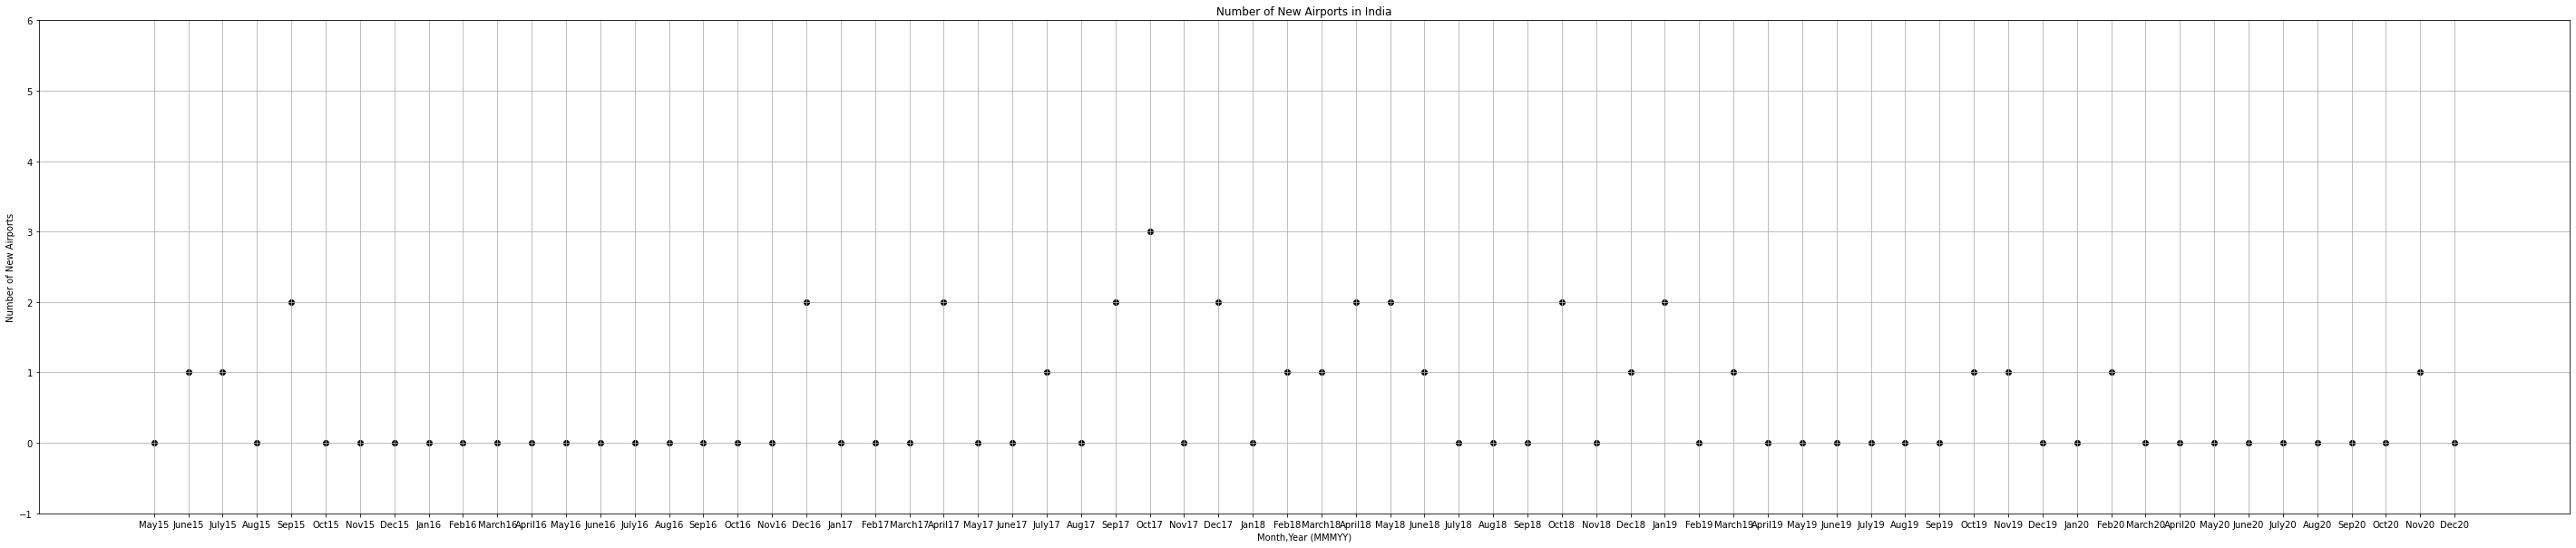

In [6]:
nnodes = []
airpor = {} 
new_airports = []
for i in range(len(graphs)):
    airports_new = []
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
            print(j)
            airports_new.append(j)
    print()
    new_airports.append(airports_new)
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/new/newnodes')
plt.show()
plt.clf()
plt.close()

In [7]:
length = max(map(len, new_airports))
y=np.array([xi+[None]*(length-len(xi)) for xi in new_airports])
pd.DataFrame(y)[:10]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,AGATTI ISLAND,KOCHI,AHMEDABAD,BENGALURU,BHOPAL,CHENNAI,COIMBATORE,DELHI,DIBRUGARH,GOA,...,DIU,PORBANDAR,LILABARI,SILCHAR,MADURAI,DURGAPUR,SHILLONG,JAMNAGAR,TEZPUR,VADODARA
1,CUDDAPAH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,AGRA,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,MYSORE,GORAKHPUR,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
def analysis(place):
    edges = {}
    for i in range(len(graphs)):
        g = graphs[i]
        in_e = g.in_edges(place)
        out_e = g.out_edges(place)
        edges[lbls1[i]] = []
        for j in in_e:
            if(j[0] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[0])
        for j in out_e:
            if(j[1] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[1])
    print(edges)
    plt.plot([len(edges[i]) for i in edges])

# TODO:
## 1) Corona ko evolution se hatao <br>
## 2) Study pre corona tak ke saare airports but focus on 2016/17 <br>
## 3) Find out 2014 mein konse airports the so we don't take into account non functional airports as new airports<br>
## 4) Arima for every airport <br>
## 5) Temporal graph for degree distribution<br>
## 6) Model that mimics/generalises behaviour<br>
## 7) Kill Juhi<br>

{'May15': [], 'June15': [], 'July15': ['VARANASI', 'KHAJURAHO'], 'Aug15': ['DELHI', 'VARANASI'], 'Sep15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Oct15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Nov15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Dec15': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Jan16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Feb16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'March16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'April16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'May16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Nov16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Dec16': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Jan17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Feb17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'March17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'April17': [], 'May17': [], 'June17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'July17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Aug17': ['DELHI', 'VARANASI', 'KHAJURAHO'], 'Se

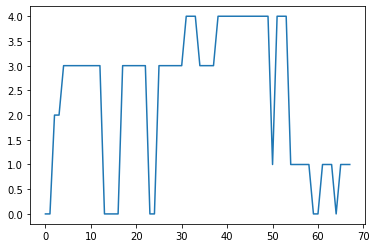

In [11]:
# AGRA
analysis("AGRA")
   

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': ['DELHI'], 'Oct15': ['DELHI'], 'Nov15': ['DELHI'], 'Dec15': [], 'Jan16': ['DELHI'], 'Feb16': ['DELHI'], 'March16': ['DELHI'], 'April16': ['DELHI'], 'May16': ['DELHI'], 'June16': ['DELHI'], 'July16': ['DELHI'], 'Aug16': ['DELHI'], 'Sep16': ['DELHI'], 'Oct16': ['DELHI', 'KOLKATA'], 'Nov16': ['DELHI', 'KOLKATA'], 'Dec16': [], 'Jan17': [], 'Feb17': ['DELHI', 'KOLKATA'], 'March17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'April17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'May17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'June17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'July17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Aug17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Sep17': ['KOLKATA', 'DELHI', 'GUWAHATI'], 'Oct17': ['DELHI', 'KOLKATA', 'GUWAHATI'], 'Nov17': ['DELHI'], 'Dec17': [], 'Jan18': [], 'Feb18': ['DELHI'], 'March18': ['DELHI'], 'April18': ['DELHI', 'SURAT'], 'May18': ['DELHI', 'SURAT'], 'June18': ['DELHI', 'SURAT'], 'July18': ['DELHI', 'SURAT'], 'Aug18': 

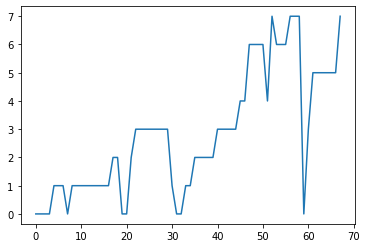

In [12]:
# GORAKHPUR
analysis("GORAKHPUR")
# edges = {}
# for i in range(len(graphs)):
#     in_e = graphs[i].in_edges("GORAKHPUR")
#     out_e = graphs[i].out_edges("GORAKHPUR")
#     edges[lbls1[i]] = []
#     for j in in_e:
#         if(j[0] not in edges[lbls1[i]]):
#             edges[lbls1[i]].append(j[0])
#     for j in out_e:
#         if(j[1] not in edges[lbls1[i]]):
#             edges[lbls1[i]].append(j[1])
# print(edges)

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': [], 'Oct15': [], 'Nov15': [], 'Dec15': [], 'Jan16': [], 'Feb16': [], 'March16': [], 'April16': [], 'May16': [], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': [], 'Nov16': [], 'Dec16': ['DELHI'], 'Jan17': ['DELHI'], 'Feb17': ['DELHI'], 'March17': ['DELHI'], 'April17': ['DELHI'], 'May17': ['DELHI'], 'June17': ['DELHI'], 'July17': ['DELHI'], 'Aug17': ['DELHI'], 'Sep17': ['DELHI'], 'Oct17': ['DELHI'], 'Nov17': ['DELHI'], 'Dec17': ['DELHI'], 'Jan18': ['DELHI'], 'Feb18': ['DELHI', 'JAMMU'], 'March18': ['DELHI', 'JAMMU'], 'April18': ['DELHI', 'JAMMU'], 'May18': ['DELHI', 'JAMMU'], 'June18': ['DELHI', 'JAMMU'], 'July18': ['DELHI', 'JAMMU'], 'Aug18': ['DELHI', 'JAMMU'], 'Sep18': ['DELHI', 'JAMMU'], 'Oct18': ['DELHI', 'JAMMU'], 'Nov18': ['DELHI', 'JAMMU'], 'Dec18': ['DELHI', 'JAMMU'], 'Jan19': ['DELHI', 'JAMMU'], 'Feb19': ['DELHI', 'JAMMU'], 'March19': ['DELHI', 'JAMMU'], 'April19': ['DELHI', 'JAMMU'], 'May19': ['DE

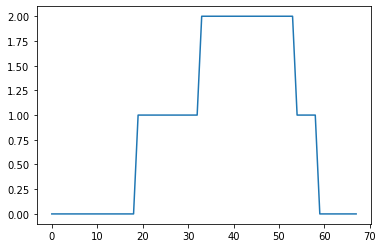

In [13]:
# BHATINDA
analysis("BHATINDA")

{'May15': [], 'June15': [], 'July15': [], 'Aug15': [], 'Sep15': [], 'Oct15': [], 'Nov15': [], 'Dec15': [], 'Jan16': [], 'Feb16': [], 'March16': [], 'April16': [], 'May16': [], 'June16': [], 'July16': [], 'Aug16': [], 'Sep16': [], 'Oct16': [], 'Nov16': [], 'Dec16': [], 'Jan17': [], 'Feb17': [], 'March17': [], 'April17': [], 'May17': [], 'June17': [], 'July17': [], 'Aug17': [], 'Sep17': [], 'Oct17': [], 'Nov17': [], 'Dec17': [], 'Jan18': [], 'Feb18': [], 'March18': [], 'April18': [], 'May18': [], 'June18': [], 'July18': [], 'Aug18': [], 'Sep18': [], 'Oct18': [], 'Nov18': [], 'Dec18': [], 'Jan19': [], 'Feb19': [], 'March19': [], 'April19': [], 'May19': [], 'June19': [], 'July19': [], 'Aug19': [], 'Sep19': [], 'Oct19': [], 'Nov19': [], 'Dec19': [], 'Jan20': [], 'Feb20': [], 'March20': [], 'April20': [], 'May20': [], 'June20': [], 'July20': [], 'Aug20': [], 'Sep20': [], 'Oct20': [], 'Nov20': [], 'Dec20': []}


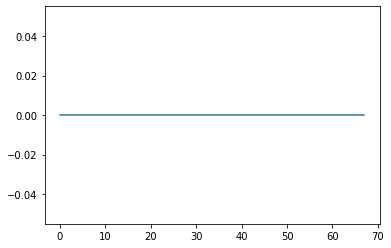

In [14]:
# Cuddapah
analysis("Cuddapah")